In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [2]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split( housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)



In [31]:

num_features=X_train.shape[1]
model  = Sequential()

# Input Layer
model.add(Dense(128, activation='relu', input_shape=(num_features,)))
# Hidden Layer
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
# Output Layer
model.add(Dense(1))






In [32]:
model.summary()
# X_train.shape[1]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1152      
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 12)                396       
                                                                 
 dense_12 (Dense)            (None, 8)                 104       
                                                                 
 dense_13 (Dense)            (None, 1)                

In [33]:
from keras.callbacks import EarlyStopping

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_absolute_error'])


# Configure early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

history = model.fit(
    X_train, y_train, 
    epochs=500,
    batch_size=8, 
    callbacks=[early_stopping],
    validation_data=(X_valid,y_valid))

Epoch 1/500
1297/1297 [==============================] - 1s 639us/step - loss: 0.5894 - mean_absolute_error: 0.5447 - val_loss: 0.4235 - val_mean_absolute_error: 0.4507
Epoch 2/500
1297/1297 [==============================] - 1s 589us/step - loss: 0.3794 - mean_absolute_error: 0.4363 - val_loss: 0.4227 - val_mean_absolute_error: 0.4683
Epoch 3/500
1297/1297 [==============================] - 1s 617us/step - loss: 0.3885 - mean_absolute_error: 0.4361 - val_loss: 0.4252 - val_mean_absolute_error: 0.4509
Epoch 4/500
1297/1297 [==============================] - 1s 620us/step - loss: 0.3847 - mean_absolute_error: 0.4403 - val_loss: 0.4559 - val_mean_absolute_error: 0.4712
Epoch 5/500
1297/1297 [==============================] - 1s 699us/step - loss: 0.3523 - mean_absolute_error: 0.4226 - val_loss: 0.6323 - val_mean_absolute_error: 0.5374
Epoch 6/500
1297/1297 [==============================] - 1s 682us/step - loss: 0.3413 - mean_absolute_error: 0.4084 - val_loss: 0.4191 - val_mean_absolute_

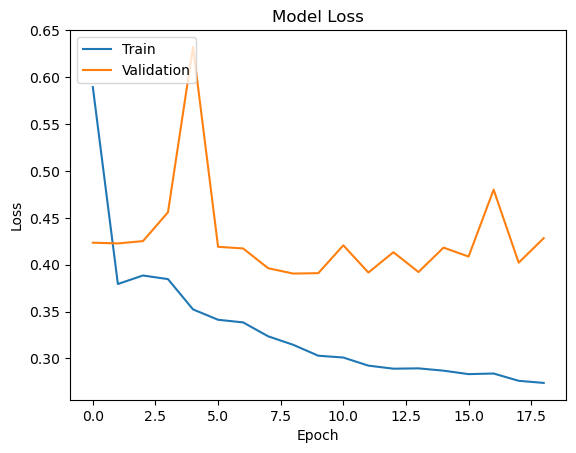

In [34]:
import matplotlib.pyplot as plt


#  Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

162/162 [==============================] - 0s 393us/step - loss: 0.3407 - mean_absolute_error: 0.4106
Test Loss: 0.3407246172428131
Test MAE: 0.4105633497238159


162/162 [==============================] - 0s 353us/step


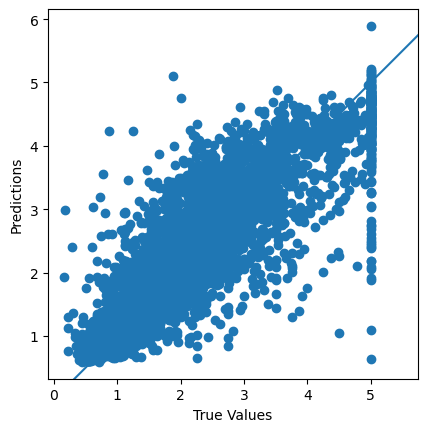

In [36]:
predictions = model.predict(X_test)
# Optionally, plot predictions against actual values for a visual comparison
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()
